<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>CPE378 Machine Learning</center>
# <center>Lecture 07-1 - Deep Neuron Network</center>
---

# Keras Tutorial 
- See https://keras.io


In [1]:
import keras
keras.__version__

'2.8.0'

## 1. Dataset

We will use a build-in data 'MNIST' which is a handwritten digit number image from 0 to 9

In [4]:
# import data set mnist ซึ่งมีอยู่แล้วใน keras
from keras.datasets import mnist  

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Type of dataset

In [5]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [6]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [7]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


    จะได้ว่า
    Train set มี 60000 รูป โดยมีขนาด 28*28
    Test set มี 10000 รูป โดยมีขนาด 28*28

### Dimension

In [8]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### Characteristic of data 

In [13]:
# ภาพที่ 1 แบบยังไม่plot
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

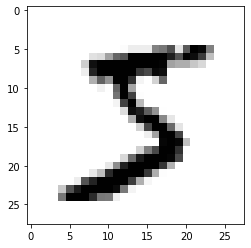

In [14]:
# ภาพที่ 1 แบบ plot
digit = train_images[0] 

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [15]:
train_labels[0] # label ของภาพที่ 1

5

## 2. Create a fully-connect neural network model

In [16]:
from keras import models
from keras import layers

In [17]:
network = models.Sequential()
# มี 2 layer หลัก ๆ 
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,))) # input layer 
network.add(layers.Dense(10, activation='softmax')) # output layer -- โดยมี Neuron 10 เพราะเป็น 10 class

In [18]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 3. Preprocessing Data

In [20]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
# แปลง label จากเดิมที่เป็นตัวเลขตัวเดียวให้กลายเป็กลักษณะคล้าย ๆ dummy
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
test_labels.shape

(10000, 10)

## 4. Train Model

In [25]:
history = network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2533 - accuracy: 0.9275
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1030 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0679 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0492 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0366 - accuracy: 0.9895


## 5. Evaluate Model

In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 1ms/step - loss: 0.0678 - accuracy: 0.9789
Test Loss: 0.06777003407478333
Test Accuracy: 0.9789000153541565


Train Accuracy: 0.9895
Test Accuracy: 0.9789000153541565

จะเห็นว่า model นี้ ค่อนข้างดีเพราะTrain Accuracy และ Test Accuracy ไม่ต่างกันมาก ไม่เกิดการ overfitting  หรือ underfitting 

In [28]:
# ข้อมูลการ update loss และ accuracy ว่าเป็นยังไงบ้าง
history.history

{'loss': [0.2532925605773926,
  0.10304050147533417,
  0.06793244183063507,
  0.04922299087047577,
  0.03658151626586914],
 'accuracy': [0.9274500012397766,
  0.9699500203132629,
  0.9797499775886536,
  0.9853833317756653,
  0.9894999861717224]}

---